# Arima Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("D:\dataset\DailyTemps.csv", index_col='DATE', parse_dates=True)
df

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2014-01-01,33.0,46.0,40.0,657,1756
2014-01-02,35.0,50.0,43.0,657,1756
2014-01-03,36.0,45.0,41.0,657,1757
2014-01-04,32.0,41.0,37.0,658,1757
2014-01-05,24.0,38.0,31.0,658,1758
...,...,...,...,...,...
2018-12-26,35.0,45.0,40.0,654,1752
2018-12-27,33.0,44.0,39.0,655,1752
2018-12-28,33.0,47.0,40.0,655,1753


In [3]:
df.dropna(inplace=True)

**Check stationarity of the data**

<AxesSubplot: xlabel='DATE'>

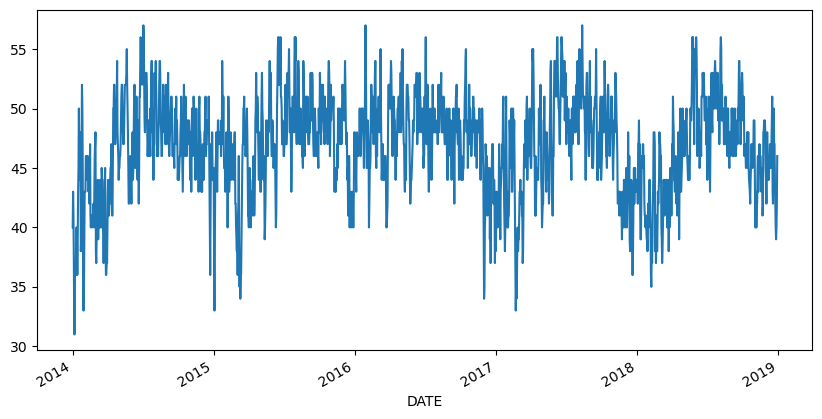

In [4]:
df['AvgTemp'].plot(figsize = (10,5))

- We can see that it seems to have somewhat of a constant mean around 45. And the fluctuations also seem to be more or less the same. However to be sure if the data is stationary or not.

In [5]:
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("P-Value : ", dftest[1])
    
    
ad_test(df['AvgTemp'])

P-Value :  8.675937480199415e-09


- If p< 0.05 ; Data is stationary

- if p>0.05; Data is not stationary

**According the p-value, the dataset is stationary as the p value is less than alpha value.**

# Arima model building.
- ARIMA is composed of 3 terms(Auto-Regression(p) + Integrated(d) + Moving-Average(q))
- First, we need to find out the order of arima model.

In [6]:
stepwise_fit = auto_arima(df['AvgTemp'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8344.703, Time=1.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=10347.755, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8365.701, Time=0.21 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=9136.225, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=19192.139, Time=0.02 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8355.947, Time=1.60 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=8356.308, Time=1.97 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=8347.319, Time=1.98 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=8317.678, Time=2.05 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=8330.188, Time=1.88 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=8310.913, Time=2.42 sec
 ARIMA(4,0,3)(0,0,0)[0] intercept   : AIC=8332.321, Time=2.55 sec
 ARIMA(3,0,4)(0,0,0)[0] intercept   : AIC=8317.470, Time=2.82 sec
 ARIMA(2,0,4)(0,0,0)[0] intercept   : AIC=8306.548, Time=2.51 sec
 ARIMA(1,0,4)(0,0,0)[0] interce

In [7]:
#Split the data
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)

(1791, 5) (30, 5)


In [8]:
model = ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1791
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -4070.198
Date:                Tue, 31 Jan 2023   AIC                           8156.395
Time:                        14:25:53   BIC                           8200.320
Sample:                             0   HQIC                          8172.614
                               - 1791                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5856      0.758     61.454      0.000      45.100      48.071
ar.L1          0.9856      0.005    188.230      0.000       0.975       0.996
ma.L1         -0.1412      0.023     -6.124      0.000      -0.186      -0.096
ma.L2         -0.2268      0.024     -9.635      0.000      -0.273      -0.181
ma.L3         -0.2168      0.023     -9.251      0.000      -0.263      -0.171
ma.L4         -0.1479      0.023     -6.491      0.000      -0.193      -0.103
ma.L5         -0.0595      0.024     -2.438      0.015      -0.107      -0.012
sigma2         5.5093      0.174     31.624      0.000       5.168       5.851
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                14.88
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.82   Skew:                            -0.15
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Evaluating the model

In [9]:
test

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
DATE,,,,,
2018-12-01,36.0,52.0,44.0,640,1743
2018-12-02,33.0,51.0,42.0,641,1743
2018-12-03,36.0,53.0,45.0,641,1743
2018-12-04,39.0,56.0,48.0,642,1743
2018-12-05,36.0,53.0,45.0,643,1743
2018-12-06,36.0,52.0,44.0,643,1743
2018-12-07,37.0,53.0,45.0,644,1744
2018-12-08,34.0,53.0,44.0,645,1744
2018-12-09,36.0,53.0,45.0,645,1744


In [10]:
index_future_dates = pd.date_range(start='2018-12-01',end='2018-12-30')
pred = model.predict(start = 1791, end = 1820)
pred.index = index_future_dates

In [11]:
from math import sqrt
test['AvgTemp'].mean()
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
print(rmse)

3.000463896296329
